# Exam: Exercise 7 - ESDIRK 23

Implicit method because not sub-diagonal Butcher-table. Still feasible, because lower triangular shape.

### 7.1 Derive the ESDIRK 23 Method

paper: ESDIRK MethodsFamily and some ESDIRK_sensitivity

### 7.2 Stability Analysis of ESDIRK

The stability of this method depends heavily on the parameter choice of $\gamma$. A common choice (from a quick internet research and forums) is $\gamma = 1 - \frac{1}{\sqrt{2}}$.

However, we can prove existence of L-stability analytically:

$$\begin{align*}
    && R(z) &= 1 + z b^T (I − zA)^{-1} e \\
    &\Leftrightarrow& R(z) &= \frac{\det(I-zA + z e b^T)}{\det(I-zA)} \tag{*} \\
    && &= \frac{z − 2z \gamma + 1}{(\gamma z - 1)^2} \tag{**} \\
    && &= \frac{z(1 -2\gamma) + 1}{1 - 2\gamma z + \gamma^2 z^2} \\
    && &= \frac{z(1 -2\gamma) + 1}{z^2 (\frac{1}{z^2} - 2\gamma \frac{1}{z} + \gamma^2)} \\
    && &= \frac{(1 -2\gamma) + 1}{z (\frac{1}{z^2} - 2\gamma \frac{1}{z} + \gamma^2)} \\
    &\Rightarrow& \lim_{z \to -\infty} |R(z)| &= \lim_{z \to -\infty} \Big| \frac{(1 -2\gamma) + 1}{z (\frac{1}{z^2} - 2\gamma \frac{1}{z} + \gamma^2)} \Big| = 0 \quad \forall \gamma \in \mathbb{R}
\end{align*}$$

for $s=3$ stages, with $e = \mathbf{1} = \underbrace{[1,1,1,...]^T}_{s \text{ times}} \in \mathbb{R}^s$ as unitary vector and $z \in \mathbb{C}$. 
Thus, the ESDIRK23 method is L-stable.
However, this does not mean, that we have a numerically stable solver for all $z$. Especially when $\gamma$ is really small, it may happen that $|R(z)|>1$ for $z$ close to the origin, as we can see in REF PLOT. Yet, this does not contradict L-stability, it simply implies, that despite being analytically L-stable, it is still important to pay attention to the choice of $\gamma$. The mentioned common choice seems reasonable and provides good stability for all $z$, c.f. REF PLOT.

For $(*)$ we used the Sylvestre matrix determinant lemma:

FILL IN

For $(**)$ we simply evaluated the determinant for the given $A$ matrix of the ESDIRK23, using Laplace's rule.

$$A = \begin{bmatrix}
\gamma & 0 & 0 \\
1- \gamma & \gamma & 0 \\
0.25 & 0.25 & \gamma 
\end{bmatrix}$$


In [5]:
from project.solver_ import ESDIRK23

solver = ESDIRK23()
print(solver.gamma)
print(solver.A)

0.29289321881345254
[[0.29289322 0.         0.        ]
 [0.70710678 0.29289322 0.        ]
 [0.25       0.25       0.29289322]]


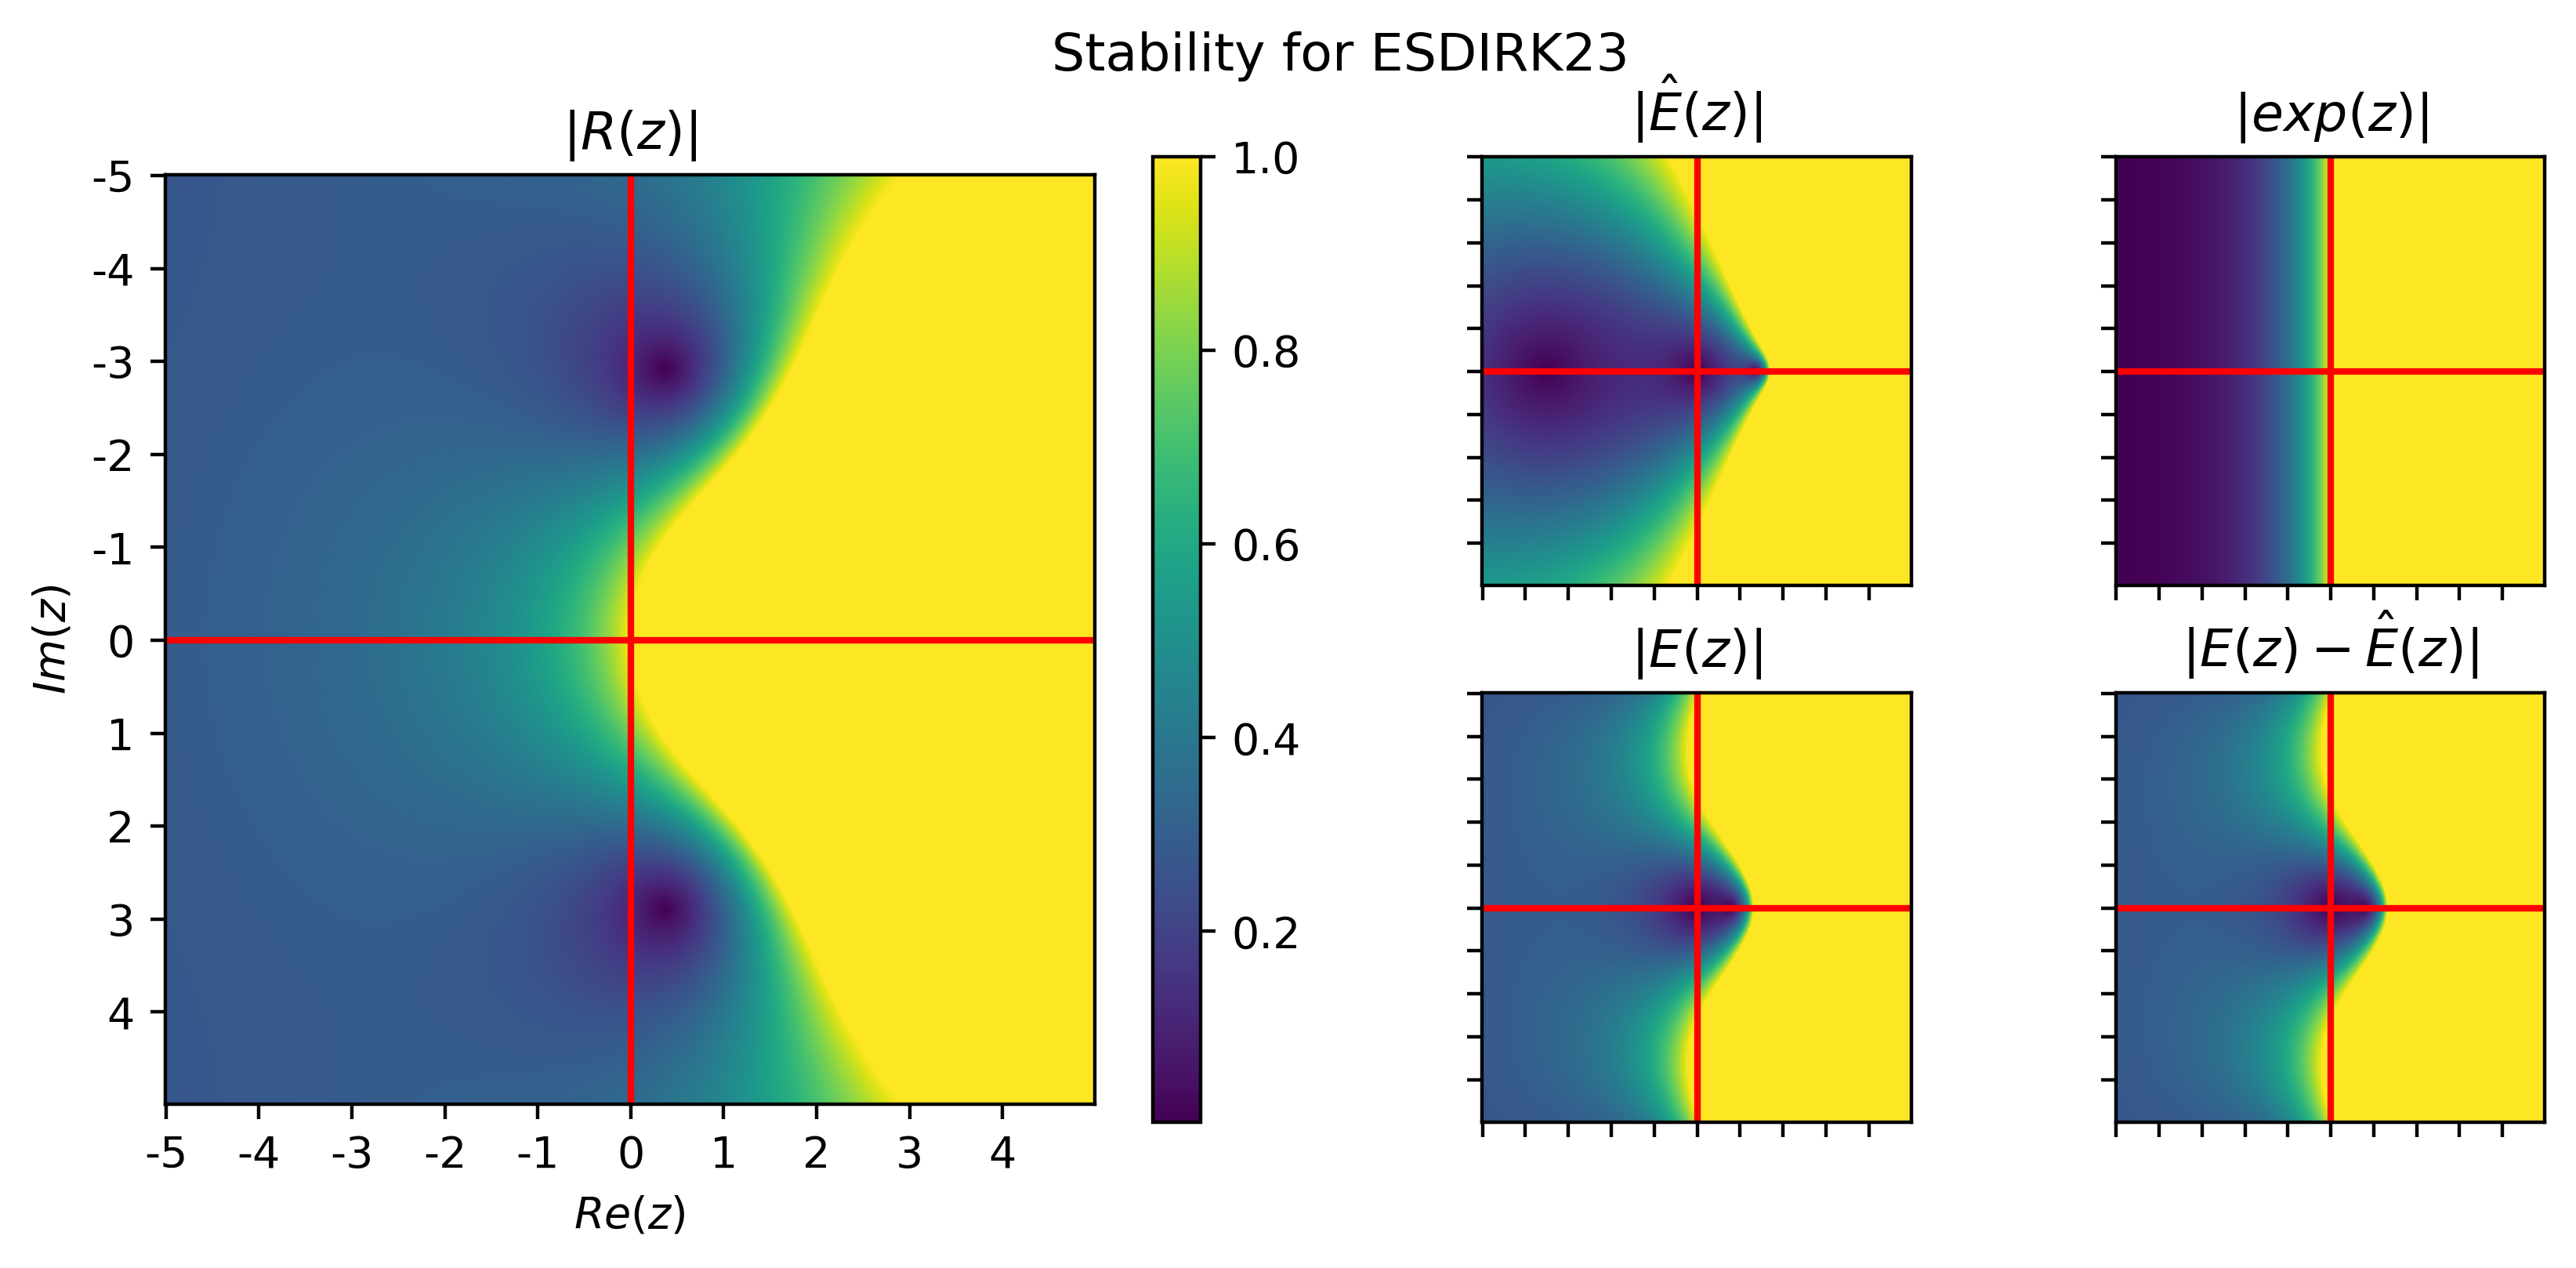

In [6]:
from project.utils import plot_RK_stability

plot_RK_stability(solver.A, solver.b, solver.e, method_name='ESDIRK23')

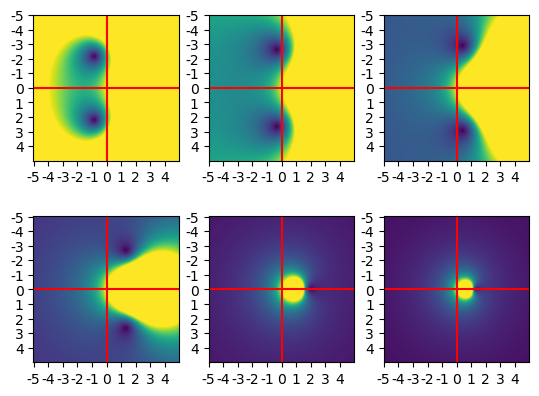

In [8]:
from project.utils import RK_stability
import matplotlib.pyplot as plt
import numpy as np

# different stabilities for different gammas:
gammas = [0.1, 0.2, 1-(1/2**0.5), 0.4, 1, 2**0.5]
for i, g in enumerate(gammas):
    solver = ESDIRK23(gamma=g)
    Rabs, _, _, _, _ = RK_stability(solver.A, solver.b, solver.e)
    plt.subplot(2, len(gammas)//2, i+1)
    plt.imshow(Rabs.clip(max=1))
    plt.axhline(500//2, color='r')
    plt.axvline(500//2, color='r')
    plt.xticks(ticks=np.arange(0, 500, 50), labels=np.arange(-5,5,1))
    plt.yticks(ticks=np.arange(0, 500, 50), labels=np.arange(-5,5,1))

### 7.3 ESDIRK23 with variable step-size (limit approach)

implemented in ```solver_.py```